In [1]:
!pip install stockstats
!pip install pykalman

In [2]:
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as Sdf
from pykalman import KalmanFilter

df = pd.read_csv("C:/Users/bhish/OneDrive/Desktop/UnivAI/largetcs1.csv")

df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2005-01-03,TCS,EQ,1335.45,1335.45,1356.7,1335.45,1352.0,1353.25,1346.52,591771,7.968308e+13,NaN,195501,0.3304
1,2005-01-04,TCS,EQ,1353.25,1350.00,1354.0,1333.15,1344.2,1341.25,1344.04,622388,8.365136e+13,NaN,205694,0.3305
2,2005-01-05,TCS,EQ,1341.25,1340.20,1340.2,1280.30,1322.0,1325.00,1313.06,1200540,1.576375e+14,NaN,313279,0.2609
3,2005-01-06,TCS,EQ,1325.00,1320.00,1346.0,1292.50,1320.0,1320.45,1320.02,1000861,1.321152e+14,NaN,215698,0.2155
4,2005-01-07,TCS,EQ,1320.45,1330.00,1345.0,1312.65,1340.0,1339.95,1333.76,952892,1.270931e+14,NaN,311075,0.3265


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2005-01-03,TCS,EQ,1335.45,1335.45,1356.7,1335.45,1352.0,1353.25,1346.52,591771,7.968308e+13,NaN,195501,0.3304
1,2005-01-04,TCS,EQ,1353.25,1350.00,1354.0,1333.15,1344.2,1341.25,1344.04,622388,8.365136e+13,NaN,205694,0.3305
2,2005-01-05,TCS,EQ,1341.25,1340.20,1340.2,1280.30,1322.0,1325.00,1313.06,1200540,1.576375e+14,NaN,313279,0.2609
3,2005-01-06,TCS,EQ,1325.00,1320.00,1346.0,1292.50,1320.0,1320.45,1320.02,1000861,1.321152e+14,NaN,215698,0.2155
4,2005-01-07,TCS,EQ,1320.45,1330.00,1345.0,1312.65,1340.0,1339.95,1333.76,952892,1.270931e+14,NaN,311075,0.3265


In [4]:
df['weekday'] = df['Date'].dt.day_name()
df['day'] = df['Date'].dt.day
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,weekday,day,week,month
0,2005-01-03,TCS,EQ,1335.45,1335.45,1356.7,1335.45,1352.0,1353.25,1346.52,591771,7.968308e+13,NaN,195501,0.3304,Monday,3,1,1
1,2005-01-04,TCS,EQ,1353.25,1350.00,1354.0,1333.15,1344.2,1341.25,1344.04,622388,8.365136e+13,NaN,205694,0.3305,Tuesday,4,1,1
2,2005-01-05,TCS,EQ,1341.25,1340.20,1340.2,1280.30,1322.0,1325.00,1313.06,1200540,1.576375e+14,NaN,313279,0.2609,Wednesday,5,1,1
3,2005-01-06,TCS,EQ,1325.00,1320.00,1346.0,1292.50,1320.0,1320.45,1320.02,1000861,1.321152e+14,NaN,215698,0.2155,Thursday,6,1,1
4,2005-01-07,TCS,EQ,1320.45,1330.00,1345.0,1312.65,1340.0,1339.95,1333.76,952892,1.270931e+14,NaN,311075,0.3265,Friday,7,1,1


In [5]:
stock  = Sdf.retype(df)

df['MACD'] = stock['macd'] - stock['macds']
df['RSI'] = stock['rsi_14']
df['adx'] = stock['adx']
df['VR'] = stock['vr']
df.head()

,symbol,series,prev close,open,high,low,last,close,vwap,volume,...,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,MACD,RSI,adx,VR
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,TCS,EQ,1335.45,1335.45,1356.7,1335.45,1352.0,1353.25,1346.52,591771,...,1353.250000,1353.250000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2005-01-04,TCS,EQ,1353.25,1350.00,1354.0,1333.15,1344.2,1341.25,1344.04,622388,...,1346.750000,1347.019231,-0.269231,-0.149573,-0.149573,-0.119658,-0.119658,0.000000,100.000000,0.000000
2005-01-05,TCS,EQ,1341.25,1340.20,1340.2,1280.30,1322.0,1325.00,1313.06,1200540,...,1338.260970,1339.107935,-0.846965,-0.435389,-0.435389,-0.411576,-0.411576,0.000000,100.000000,0.000000
2005-01-06,TCS,EQ,1325.00,1320.00,1346.0,1292.50,1320.0,1320.45,1320.02,1000861,...,1332.638743,1333.891992,-1.253249,-0.712442,-0.712442,-0.540807,-0.540807,0.000000,90.222029,0.000000
2005-01-07,TCS,EQ,1320.45,1330.00,1345.0,1312.65,1340.0,1339.95,1333.76,952892,...,1334.625185,1335.296869,-0.671684,-0.700317,-0.700317,0.028634,0.028634,41.187596,85.597313,33.745156


In [6]:
df['returns_yesterday'] = df.close.pct_change()
df['returns_week'] = df.close.pct_change(5)
df['returns_month'] = df.close.pct_change(22)
df['MA_5_diff'] = (df.close.rolling(5).mean() - df.close)/df.close
df['MA_20_diff'] = (df.close.rolling(20).mean() - df.close)/df.close
df['MA_50_diff'] = (df.close.rolling(50).mean() - df.close)/df.close
df['adv20'] = (df.volume.rolling(20).mean() - df.volume)/df.volume


In [7]:
kf = KalmanFilter(em_vars='all')
kf.initial_state_mean = df['close'][0]
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(df['close'])


df['Kalman_diff'] = (pd.DataFrame(smoothed_state_means.reshape(1,-1)[0]).set_index(df.index) [0] - df['close'])/df['close']


In [8]:
test = df[['close','open']]
test

,close,open
date,,
2005-01-03,1353.25,1335.45
2005-01-04,1341.25,1350.00
2005-01-05,1325.00,1340.20
2005-01-06,1320.45,1320.00
2005-01-07,1339.95,1330.00
...,...,...
2019-11-25,2081.50,2074.55
2019-11-26,2046.65,2089.85
2019-11-27,2054.30,2052.00


In [9]:
df['Y'] = np.where(df.close.shift(-1) > test['close'],1,-1)
df.tail()

,symbol,series,prev close,open,high,low,last,close,vwap,volume,...,VR,returns_yesterday,returns_week,returns_month,MA_5_diff,MA_20_diff,MA_50_diff,adv20,Kalman_diff,Y
date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,TCS,EQ,2071.70,2074.55,2084.95,2052.20,2083.50,2081.50,2075.63,2737010,...,102.561016,0.004730,-0.033030,0.005507,0.007797,0.038327,0.012787,0.108143,-0.002935,-1
2019-11-26,TCS,EQ,2081.50,2089.85,2097.90,2035.05,2046.65,2046.65,2056.29,6561580,...,96.069334,-0.016743,-0.029472,-0.016979,0.018885,0.054320,0.028983,-0.489474,0.006896,1
2019-11-27,TCS,EQ,2046.65,2052.00,2071.70,2046.55,2055.00,2054.30,2060.49,2907521,...,95.653071,0.003738,-0.025729,-0.033248,0.009809,0.046973,0.024380,0.115047,0.002897,1
2019-11-28,TCS,EQ,2054.30,2067.05,2094.40,2060.00,2075.90,2077.35,2081.33,2924429,...,117.451461,0.011220,-0.019239,-0.018126,-0.005319,0.031133,0.012391,0.069777,-0.005613,-1
2019-11-29,TCS,EQ,2077.35,2085.00,2085.00,2045.80,2051.65,2053.25,2055.87,2064271,...,105.473392,-0.011601,-0.008906,-0.064515,0.004559,0.037967,0.023332,0.447358,0.003030,-1


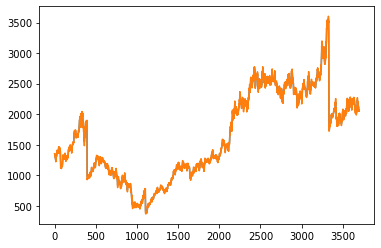

In [10]:
import matplotlib.pyplot as plt
plt.plot(smoothed_state_means)
plt.plot(df['close'].values)

In [11]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [12]:
df = shuffle(df,random_state=0)

In [13]:
df.head()

,symbol,series,prev close,open,high,low,last,close,vwap,volume,...,VR,returns_yesterday,returns_week,returns_month,MA_5_diff,MA_20_diff,MA_50_diff,adv20,Kalman_diff,Y
date,,,,,,,,,,,,,,,,,,,,,
2007-02-08,TCS,EQ,1306.30,1311.40,1314.90,1297.35,1305.10,1304.50,1306.00,662506,...,152.406195,-0.001378,0.009636,0.032858,-0.001073,-0.002390,-0.054279,0.594232,-0.006153,-1
2015-12-17,TCS,EQ,2408.40,2415.00,2445.00,2393.35,2434.10,2439.75,2418.57,809422,...,113.692847,0.013017,0.023149,0.027436,-0.017239,-0.029015,0.006482,0.226213,-0.006735,-1
2011-05-12,TCS,EQ,1140.25,1133.90,1133.90,1108.35,1113.95,1111.75,1118.62,1270229,...,44.577950,-0.024995,-0.032377,-0.070443,0.021165,0.042390,0.030086,0.467926,0.011856,1
2019-06-24,TCS,EQ,2249.85,2254.15,2280.00,2250.80,2277.00,2275.50,2267.80,1382424,...,178.379876,0.011401,0.011693,0.093071,-0.005577,-0.029453,-0.050750,1.121884,-0.003925,-1
2018-04-18,TCS,EQ,3166.60,3166.00,3193.45,3145.85,3162.70,3159.10,3166.57,1216533,...,43.586862,-0.002368,0.048090,0.100847,0.000658,-0.062921,-0.057646,0.386342,0.010586,1


In [14]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [15]:
columns = ['symbol','series','weekday']
df = df.drop(columns, 1)
df = clean_dataset(df)

In [16]:
columns = ['Y']
df2 = df.drop(columns, 1)
X = df2
y = df['Y']

In [17]:
cols = X.columns
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(columns = list(cols))
for i in X.columns:
    placeholder =  scaler.fit_transform(X[[i]].values)
    X_scaled[i] = placeholder.reshape(1,-1)[0]

In [18]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2105, 33)
(2105,)


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, train_size = 0.7, random_state = 121)

In [20]:
degree=4
lreg = make_pipeline(PolynomialFeatures(degree),scaler,LogisticRegression(C=0.01, max_iter=20000,penalty='l2'))
#lreg = LogisticRegression(PolynomialFeatures(degree),random_state=5, max_iter = 20000,C=0.1,penalty='l2')
#Fit the model using the training set

lreg.fit(X_train,y_train)

# Make the predictions on the training & validation set

y_train_pred = lreg.predict(X_train)

y_val_pred = lreg.predict(X_val)


In [21]:
train_accuracy = accuracy_score(y_train, y_train_pred)
validation_accuracy = accuracy_score(y_val, y_val_pred)

# Print the two accuracies below

print("Train Accuracy", train_accuracy)
print("Validation Accuracy", validation_accuracy)

Train Accuracy 0.8513238289205702
Validation Accuracy 0.8069620253164557


In [22]:
cv_score = cross_val_score(lreg,X,y,cv=10)

# Print the cross validation scores

print("CV Score", cv_score,'\n')

CV Score [0.8436019  0.74881517 0.78199052 0.78672986 0.81990521 0.80952381
 0.78571429 0.79047619 0.75238095 0.8       ] 



In [23]:
cv_score_mean = np.mean(cv_score)
cv_score_std = np.std(cv_score)

print(f"The mean of 10-fold cross validation accuracy is {cv_score_mean} with std deviation {cv_score_std}")
print(f"Compared to the validation accuracy from above {validation_accuracy}") 

The mean of 10-fold cross validation accuracy is 0.7919137892123673 with std deviation 0.027233914963193533
Compared to the validation accuracy from above 0.8069620253164557


In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, train_size = 0.7, random_state = 120)

In [41]:
from sklearn.svm import SVC
degree=4
svm = make_pipeline(PolynomialFeatures(degree),scaler,SVC(kernel='linear'))
#clf = make_pipeline(StandardScaler(), SVC())
#lreg = LogisticRegression(PolynomialFeatures(degree),random_state=5, max_iter = 20000,C=0.1,penalty='l2')
#Fit the model using the training set

svm.fit(X_train2,y_train2)

# Make the predictions on the training & validation set

y_train_pred2 = svm.predict(X_train2)

y_test_pred2 = svm.predict(X_test2)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2,y_test_pred2))
print(classification_report(y_test2,y_test_pred2))

[[256  58]
 [ 49 269]]
              precision    recall  f1-score   support

        -1.0       0.84      0.82      0.83       314
         1.0       0.82      0.85      0.83       318

    accuracy                           0.83       632
   macro avg       0.83      0.83      0.83       632
weighted avg       0.83      0.83      0.83       632



In [44]:
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)
validation_accuracy2 = accuracy_score(y_test2, y_test_pred2)

# Print the two accuracies below

print("Train Accuracy2", train_accuracy2)
print("Validation Accuracy2", validation_accuracy2)

Train Accuracy2 0.9151391717583164
Validation Accuracy2 0.8306962025316456


In [45]:
cv_score2 = cross_val_score(svm,X,y,cv=10)

# Print the cross validation scores

print("CV Score", cv_score2,'\n')

CV Score [0.81042654 0.82938389 0.81990521 0.86255924 0.83886256 0.83333333
 0.83333333 0.8        0.81428571 0.85238095] 



In [46]:
cv_score_mean2 = np.mean(cv_score2)
cv_score_std2 = np.std(cv_score2)

print(f"The mean of 10-fold cross validation accuracy from svm is {cv_score_mean2} with std deviation {cv_score_std2}")
print(f"Compared to the svm validation accuracy from above {validation_accuracy2}") 

The mean of 10-fold cross validation accuracy from svm is 0.8294470774091627 with std deviation 0.018141291603951466
Compared to the svm validation accuracy from above 0.8306962025316456
